In [ ]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, confusion_matrix, accuracy_score, f1_score, recall_score, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold,RepeatedKFold
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import statistics
from tqdm import tqdm


In [ ]:
!pip install tqdm


In [ ]:
cd c:/Master thesis

c:\Master thesis


In [ ]:
#importing our  dataset
df = pd.read_csv('BP-MDD.csv', names = range(46))

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.056843,0.056034,0.056087,0.108260,0.067739,0.042298,0.101730,0.082679,0.066114,0.082551,...,0.062902,0.070859,0.099695,0.085014,0.103530,0.062956,0.068951,0.066857,0.078855,1
1,0.043384,0.067421,0.080000,0.082357,0.067969,0.046202,0.081793,0.093981,0.066849,0.084358,...,0.061850,0.068831,0.095510,0.064500,0.064815,0.058589,0.103060,0.059452,0.062202,1
2,0.041608,0.047949,0.079565,0.095533,0.075895,0.045371,0.058734,0.092157,0.078914,0.086527,...,0.066815,0.057044,0.100950,0.066990,0.077759,0.064037,0.123680,0.061762,0.065460,1
3,0.043108,0.040895,0.088175,0.061942,0.077486,0.054561,0.070293,0.099378,0.067504,0.096049,...,0.062421,0.061719,0.110120,0.065946,0.061221,0.057709,0.074477,0.066392,0.076199,1
4,0.032052,0.064807,0.095159,0.075693,0.091843,0.045781,0.052411,0.092720,0.074285,0.082294,...,0.066314,0.056200,0.093392,0.060312,0.072847,0.056664,0.075082,0.061823,0.060891,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.039334,0.039038,0.063290,0.069748,0.078538,0.049620,0.071981,0.101090,0.080842,0.084489,...,0.066731,0.063783,0.094780,0.066084,0.079840,0.063200,0.097518,0.058948,0.062585,2
138,0.035053,0.082281,0.093746,0.053249,0.058982,0.067863,0.087905,0.111840,0.067916,0.106890,...,0.063147,0.067529,0.111490,0.081081,0.081021,0.066966,0.105460,0.061842,0.066194,2
139,0.096909,0.067993,0.058444,0.063203,0.055530,0.049171,0.077054,0.168220,0.063023,0.116360,...,0.078490,0.067481,0.114340,0.085695,0.106790,0.074392,0.240020,0.087765,0.095459,2
140,0.039809,0.065715,0.065073,0.059256,0.072133,0.054797,0.058030,0.093569,0.072504,0.088011,...,0.072091,0.068698,0.117440,0.082197,0.073691,0.061511,0.094285,0.060423,0.066782,2


In [ ]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [ ]:
X = df.iloc[:, 0:45]
y = df.iloc[:, 45]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.056843,0.056034,0.056087,0.108260,0.067739,0.042298,0.101730,0.082679,0.066114,0.082551,...,0.103090,0.062902,0.070859,0.099695,0.085014,0.103530,0.062956,0.068951,0.066857,0.078855
1,0.043384,0.067421,0.080000,0.082357,0.067969,0.046202,0.081793,0.093981,0.066849,0.084358,...,0.087186,0.061850,0.068831,0.095510,0.064500,0.064815,0.058589,0.103060,0.059452,0.062202
2,0.041608,0.047949,0.079565,0.095533,0.075895,0.045371,0.058734,0.092157,0.078914,0.086527,...,0.071295,0.066815,0.057044,0.100950,0.066990,0.077759,0.064037,0.123680,0.061762,0.065460
3,0.043108,0.040895,0.088175,0.061942,0.077486,0.054561,0.070293,0.099378,0.067504,0.096049,...,0.067520,0.062421,0.061719,0.110120,0.065946,0.061221,0.057709,0.074477,0.066392,0.076199
4,0.032052,0.064807,0.095159,0.075693,0.091843,0.045781,0.052411,0.092720,0.074285,0.082294,...,0.067087,0.066314,0.056200,0.093392,0.060312,0.072847,0.056664,0.075082,0.061823,0.060891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.039334,0.039038,0.063290,0.069748,0.078538,0.049620,0.071981,0.101090,0.080842,0.084489,...,0.073506,0.066731,0.063783,0.094780,0.066084,0.079840,0.063200,0.097518,0.058948,0.062585
138,0.035053,0.082281,0.093746,0.053249,0.058982,0.067863,0.087905,0.111840,0.067916,0.106890,...,0.065212,0.063147,0.067529,0.111490,0.081081,0.081021,0.066966,0.105460,0.061842,0.066194
139,0.096909,0.067993,0.058444,0.063203,0.055530,0.049171,0.077054,0.168220,0.063023,0.116360,...,0.066757,0.078490,0.067481,0.114340,0.085695,0.106790,0.074392,0.240020,0.087765,0.095459
140,0.039809,0.065715,0.065073,0.059256,0.072133,0.054797,0.058030,0.093569,0.072504,0.088011,...,0.072448,0.072091,0.068698,0.117440,0.082197,0.073691,0.061511,0.094285,0.060423,0.066782


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
137    2
138    2
139    2
140    2
141    2
Name: 45, Length: 142, dtype: int64

In [ ]:
#Create the features
nonlr_clf_dict = dict()


clf1 = LinearDiscriminantAnalysis()
nonlr_clf_dict['Linear Discriminant Classifier'] = clf1

clf2 = QuadraticDiscriminantAnalysis()
nonlr_clf_dict['Quadratic Discriminant Classifier'] = clf2


clf3 = RandomForestClassifier()
nonlr_clf_dict['Random Forest Classifier'] = clf3


clf4 = tree.DecisionTreeClassifier()
nonlr_clf_dict['Decision Trees Classifier'] = clf4


clf5 = GaussianNB()
nonlr_clf_dict['Naive Bayes Classifier'] = clf5




In [ ]:
# defined the function to return specificity ,sensitivity , precision , f1score , auc for each classifier
def evaluate_model(clf, X, y):                       
#for clf_name, clf in nonlr_clf_dict.items():
    specificity = list()
    sensitvity = list()
    f1_scores = list()
    auc_scores = list()
    accuracy_scores = list()
    precision_scores = list()  

    specificity_std = list()
    sensitvity_std = list()
    f1_scores_std = list()
    auc_scores_std = list()
    accuracy_scores_std = list()
    precision_scores_std = list()   

    for i in range(0, 44):# features
    # for i in range(0, 3):
        # We generate the set of features
        feat = X.iloc[:,:i+1]
        target = y
        # n_repeats=100
        fold = RepeatedKFold(n_splits=5, n_repeats=50, random_state=10)
        # list for each features
        split_sensi = list()
        split_speci = list()
        split_accu = list()
        split_f1 = list()
        split_precision = list()
        split_auc = list()

        #for n in range(100):
        for train_index, test_index in fold.split(feat):# train_index, test_index in skf.split():
            # X_train, X_test = ?
            # y_train, y_test = ?
            X_train= feat.iloc[train_index,:]
            X_test = feat.iloc[test_index,:]
            y_train = target.iloc[train_index]
            y_test= target.iloc[test_index]
                
                # fit             
            # Fitting the classifier 
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            # We have confusion matrx
            cm = confusion_matrix(y_test,y_pred)
            tn, fp, fn, tp = cm.ravel()

            # Calucating metrics for each iteration
            split_sensi.append(tp / (tp+fn))
            split_speci.append(tn / (tn+fp))
            
            # Calculating accuracy
            split_accu.append(accuracy_score(y_test, y_pred))

            # Calculating auc_scores
            split_auc.append(roc_auc_score(y_test, y_pred))

            # Calculating f1 scores
            split_f1.append(f1_score(y_test, y_pred))

            # Calculating precision
            split_precision.append((tp / (tp + fp)) )
                
            # average [5]
         # After competing all folds, appending the average of metrics to the main matric list
         # mean = sum(list)/len(list)
        sensitvity.append(sum(split_sensi) / len(split_sensi))
        specificity.append(sum(split_speci) / len(split_sensi))
        precision_scores.append(sum(split_precision) / len(split_sensi))
        auc_scores.append(sum(split_auc) / len(split_sensi))
        accuracy_scores.append(sum(split_accu) / len(split_sensi))
        f1_scores.append(sum(split_f1) / len(split_sensi))
        # st dev --> import statistics, statistics.pstdev(list)
        sensitvity_std.append(statistics.stdev(split_sensi))
        specificity_std.append(statistics.stdev(split_speci))
        precision_scores_std.append(statistics.stdev(split_precision))
        auc_scores_std.append(statistics.stdev(split_auc))
        accuracy_scores_std.append(statistics.stdev(split_accu))
        f1_scores_std.append(statistics.stdev(split_f1))

       
    print("")
    #print("Classifier :",  clf_name)

    print("specificity :",  specificity)
    print("sensitvity :", sensitvity)
    print("f1_scores :",f1_scores)
    print("auc_scores :", auc_scores)
    print("accuracy_scores :", accuracy_scores)
    print("precision_scores :", precision_scores)
    print("")
    print("sensitvity_std :",  sensitvity_std)
    print("specificity_std :", specificity_std)
    print("precision_scores_std :",precision_scores_std)
    print("auc_scores_std :", auc_scores_std)
    print("accuracy_scores_std :", accuracy_scores_std)
    print("f1_scores_std :", f1_scores_std)
    return {
    "specificity" : specificity,
    "sensitvity" : sensitvity,
    "f1_scores" : f1_scores,
    "auc_scores" : auc_scores,
    "accuracy_scores" : accuracy_scores,
    "precision_scores" : precision_scores,
    }    



In [ ]:
#Create the features for graphs
NB_clf =GaussianNB()
DT_clf = tree.DecisionTreeClassifier()
RF_clf =RandomForestClassifier()
LDA_clf = LinearDiscriminantAnalysis()
QDA_clf= QuadraticDiscriminantAnalysis()

# **Naive Bayes**

Implementation

In [ ]:
# Evaluating the Classifier
print("Classifier : Naive Bayes")
#for i in tqdm(range(45)):
gaussianScores = evaluate_model(NB_clf, df, y)
print(gaussianScores)

Classifier : Naive Bayes

specificity : [0.45769339451398294, 0.5142032455848247, 0.5301229906660243, 0.5848167970488403, 0.722166578708529, 0.6603060340588206, 0.5922708666462536, 0.669479212926736, 0.6778196603705884, 0.6966606896027948, 0.7186838513911263, 0.7507232078379136, 0.7958451231431098, 0.788318119273227, 0.7733024946158071, 0.802163468746595, 0.8052235199784729, 0.8277328849341233, 0.8394495408959809, 0.8463922808357791, 0.8431340642157976, 0.850127098649544, 0.823896366309988, 0.8343278305114217, 0.8354292215180764, 0.8469544154332082, 0.8549785421149193, 0.8577785895391152, 0.8615861184395235, 0.856142817227492, 0.8621521644849812, 0.8637212636864331, 0.8574146306222155, 0.8558133786062577, 0.8604412797041279, 0.8485336698389327, 0.8456587524274825, 0.852368072278598, 0.8568408174213126, 0.8400035840836144, 0.8436293323635426, 0.8412139542947591, 0.8332437773440866, 0.8371958355713771]
sensitvity : [0.8088306337625217, 0.7637256598406744, 0.7338266867807111, 0.7287380787

In [ ]:
# For maximum values for each classifiers
maxValues = list()

In [ ]:
# Getting index for the maximum values
maxIndex = np.argmax(np.array(gaussianScores['accuracy_scores']))

maxValues.append(["Naive Bayes", 
maxIndex,
gaussianScores["accuracy_scores"][maxIndex], 
gaussianScores["specificity"][maxIndex],
gaussianScores["sensitvity"][maxIndex],
gaussianScores["f1_scores"][maxIndex],
gaussianScores["auc_scores"][maxIndex],
gaussianScores["precision_scores"][maxIndex],
])

In [ ]:
# For maximum values for each classifiers
maxValues = list()
print("Maximum feature of Naive Bayes Classifier : ", maxIndex)

Maximum feature of Naive Bayes Classifier :  28


**Metrics for Naive Bayes Classifier**

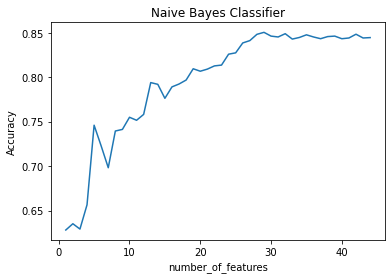

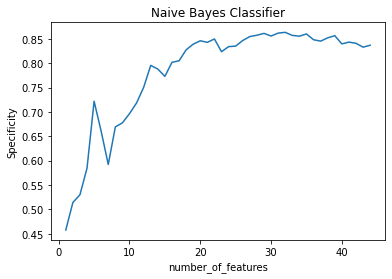

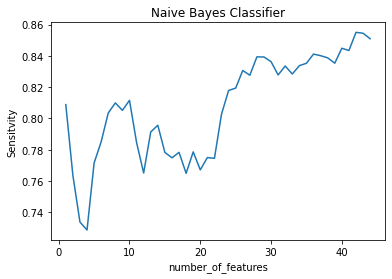

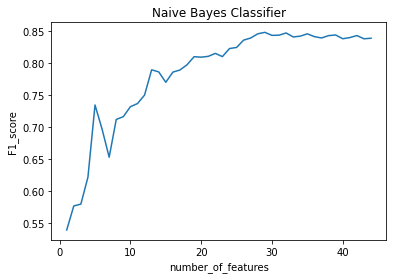

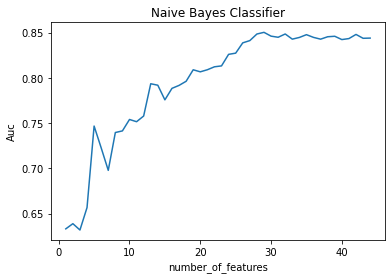

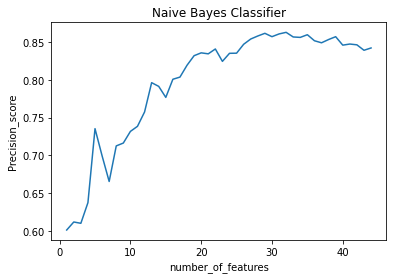

In [ ]:
# Plotting number of features vs the metrics

# number of features vs accuracy
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Accuracy": np.array(gaussianScores['accuracy_scores'])})
sns.lineplot(x='number_of_features', y='Accuracy', data=data)
plt.title('Naive Bayes Classifier')
plt.show()

# number of features vs specificity
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Specificity": np.array(gaussianScores['specificity'])})
sns.lineplot(x='number_of_features', y='Specificity', data=data)
plt.title('Naive Bayes Classifier')
plt.show()

# number of features vs sensitvity
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Sensitvity": np.array(gaussianScores['sensitvity'])})
sns.lineplot(x='number_of_features', y='Sensitvity', data=data)
plt.title('Naive Bayes Classifier')
plt.show()

# number of features vs f1_scores
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"F1_score": np.array(gaussianScores['f1_scores'])})
sns.lineplot(x='number_of_features', y='F1_score', data=data)
plt.title('Naive Bayes Classifier')
plt.show()

# number of features vs auc
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Auc": np.array(gaussianScores['auc_scores'])})
sns.lineplot(x='number_of_features', y='Auc', data=data)
plt.title('Naive Bayes Classifier')
plt.show()

# number of features vs precision
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Precision_score": np.array(gaussianScores['precision_scores'])})
sns.lineplot(x='number_of_features', y='Precision_score', data=data)
plt.title('Naive Bayes Classifier')
plt.show()


# **Decision Tree**

Implementation

In [ ]:
# Evaluating the Classifier
print("Classifier : Decision Trees Classifier")
DTScores = evaluate_model(DT_clf, df, y)
print(DTScores)


Classifier : Decision Trees Classifier

specificity : [0.6178848502718468, 0.6071434551001111, 0.6570360749329786, 0.6875507213288945, 0.7310129574759602, 0.7514076290238827, 0.7551236561340274, 0.7565344543313582, 0.7588363936545045, 0.769817928545482, 0.7559360344505848, 0.7482049608973751, 0.7437571884943394, 0.7471931737337307, 0.744300004244121, 0.7400420292126172, 0.7328615107802411, 0.7473939740685862, 0.7417468294519374, 0.7364932234432228, 0.7372128861334741, 0.7290137246138789, 0.7311995619619456, 0.7269596110975366, 0.7304775207764376, 0.720353619531483, 0.7241969607447938, 0.715990156850373, 0.7162008636186644, 0.720034164957849, 0.710624089343748, 0.7091948216214464, 0.7084620465018286, 0.7168421279099295, 0.7206115033057751, 0.7194564691414533, 0.7158054095543256, 0.7155870498954087, 0.7101120899052784, 0.7170986158664172, 0.7158825565387478, 0.7049088587195396, 0.7068437758663754, 0.7122989820980528]
sensitvity : [0.5675088520870253, 0.6144034905411063, 0.653291442269460

**Metrics for Decision Trees Classifier**

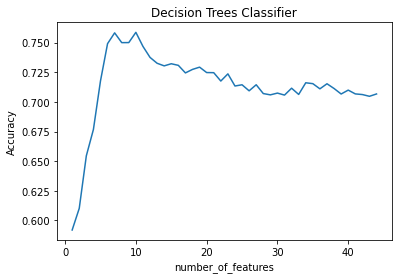

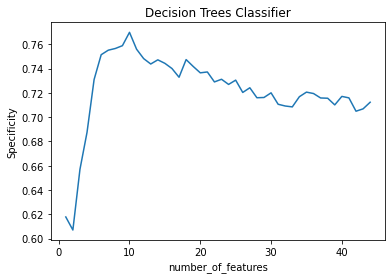

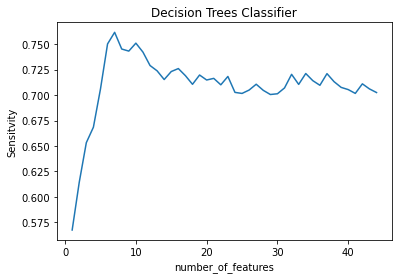

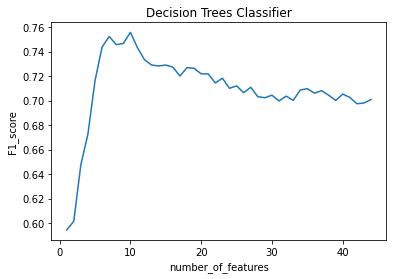

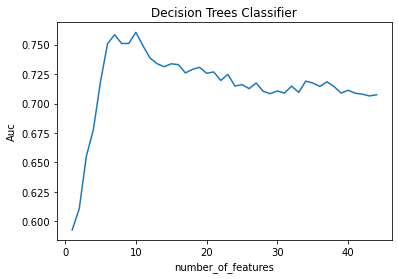

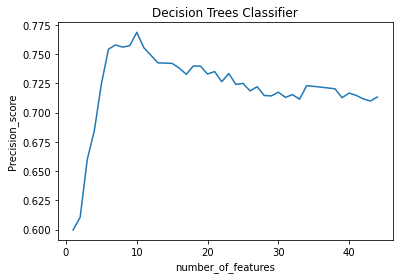

In [ ]:
# Plotting number of features vs the metrics

# number of features vs accuracy
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Accuracy": np.array(DTScores['accuracy_scores'])})
sns.lineplot(x='number_of_features', y='Accuracy', data=data)
plt.title('Decision Trees Classifier')
plt.show()

# number of features vs specificity
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Specificity": np.array(DTScores['specificity'])})
sns.lineplot(x='number_of_features', y='Specificity', data=data)
plt.title('Decision Trees Classifier')
plt.show()

# number of features vs sensitvity
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Sensitvity": np.array(DTScores['sensitvity'])})
sns.lineplot(x='number_of_features', y='Sensitvity', data=data)
plt.title('Decision Trees Classifier')
plt.show()

# number of features vs f1_scores
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"F1_score": np.array(DTScores['f1_scores'])})
sns.lineplot(x='number_of_features', y='F1_score', data=data)
plt.title('Decision Trees Classifier')
plt.show()

# number of features vs auc
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Auc": np.array(DTScores['auc_scores'])})
sns.lineplot(x='number_of_features', y='Auc', data=data)
plt.title('Decision Trees Classifier')
plt.show()

# number of features vs precision
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Precision_score": np.array(DTScores['precision_scores'])})
sns.lineplot(x='number_of_features', y='Precision_score', data=data)
plt.title('Decision Trees Classifier')
plt.show()

In [ ]:
# Getting index for the maximum values
maxIndex = np.argmax(np.array(DTScores['accuracy_scores']))

maxValues.append(["Decision Trees", 
maxIndex,
DTScores["accuracy_scores"][maxIndex], 
DTScores["specificity"][maxIndex],
DTScores["sensitvity"][maxIndex],
DTScores["f1_scores"][maxIndex],
DTScores["auc_scores"][maxIndex],
DTScores["precision_scores"][maxIndex],
])

In [ ]:
# For maximum values for each classifiers
maxValues = list()
print('Maximum value feature of Decision Trees Classifier : ',maxIndex)

Maximum value feature of Decision Trees Classifier :  9


# **Random Forest**
Implementation

In [ ]:
print('Random Forest Classifier')
RFScores = evaluate_model(RF_clf, df, y)
print(RFScores)

Random Forest Classifier

specificity : [0.6092697158190961, 0.6630202679501437, 0.689740265015342, 0.7293642930684718, 0.7890234617291888, 0.8334077956099626, 0.8301802037315966, 0.8392927676382782, 0.8420913513387192, 0.8530895526214403, 0.8596973887309798, 0.8470774679740625, 0.8575642750266581, 0.8565240933129473, 0.8581707555602287, 0.8516254981172934, 0.8553590544474441, 0.8597361631144909, 0.8634270503146659, 0.8786500302758813, 0.8769755330324983, 0.8767623219058197, 0.8691158854217671, 0.873151400319666, 0.8677633885034809, 0.8663252391399444, 0.8727128418021602, 0.8696275727368605, 0.8645826622809587, 0.8669799461116794, 0.8664659561113115, 0.8632878130984939, 0.8563180478963754, 0.8613771857313647, 0.8571503064187269, 0.8550286770505027, 0.8600763424741747, 0.8562806616671935, 0.8603862037687108, 0.8453452150188984, 0.8509286272722801, 0.8524523738731165, 0.8412261319863482, 0.8406918278831589]
sensitvity : [0.5683743491630487, 0.6447866418239477, 0.6840158931196081, 0.74104

**Metrics Random Forest**

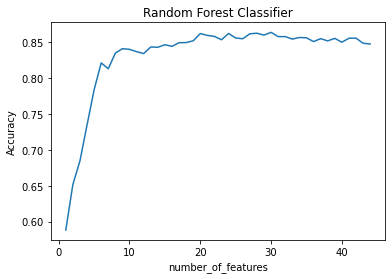

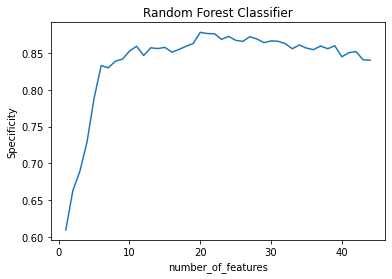

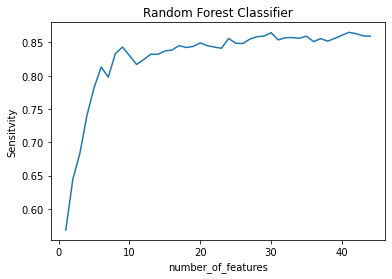

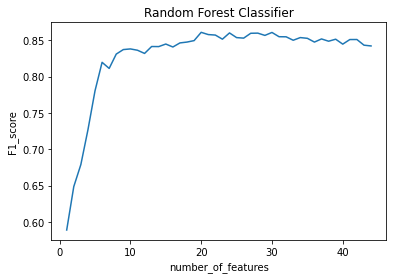

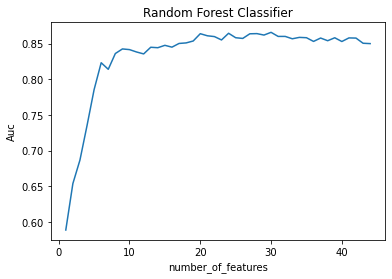

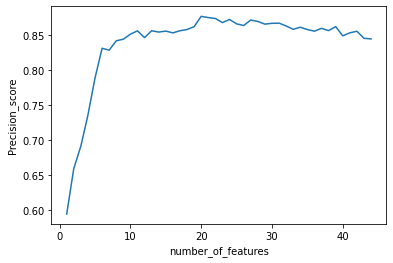

In [ ]:
# Plotting number of features vs the metrics

# number of features vs accuracy
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Accuracy": np.array(RFScores['accuracy_scores'])})
sns.lineplot(x='number_of_features', y='Accuracy', data=data)
plt.title('Random Forest Classifier')
plt.show()

# number of features vs specificity
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Specificity": np.array(RFScores['specificity'])})
sns.lineplot(x='number_of_features', y='Specificity', data=data)
plt.title('Random Forest Classifier')
plt.show()

# number of features vs sensitvity
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Sensitvity": np.array(RFScores['sensitvity'])})
sns.lineplot(x='number_of_features', y='Sensitvity', data=data)
plt.title('Random Forest Classifier')
plt.show()

# number of features vs f1_scores
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"F1_score": np.array(RFScores['f1_scores'])})
sns.lineplot(x='number_of_features', y='F1_score', data=data)
plt.title('Random Forest Classifier')
plt.show()

# number of features vs auc
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Auc": np.array(RFScores['auc_scores'])})
sns.lineplot(x='number_of_features', y='Auc', data=data)
plt.title('Random Forest Classifier')
plt.show()

# number of features vs precision
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Precision_score": np.array(RFScores['precision_scores'])})
sns.lineplot(x='number_of_features', y='Precision_score', data=data)

In [ ]:
# Getting index for the maximum values
maxIndex = np.argmax(np.array(RFScores['accuracy_scores']))

maxValues.append(["Random Forest", 
maxIndex,
RFScores["accuracy_scores"][maxIndex], 
RFScores["specificity"][maxIndex],
RFScores["sensitvity"][maxIndex],
RFScores["f1_scores"][maxIndex],
RFScores["auc_scores"][maxIndex],
RFScores["precision_scores"][maxIndex],
])

In [ ]:
# For maximum values for each classifiers
maxValues = list()
print('Maximum value feature of Random Forest Classifier', maxIndex)

Maximum value feature of Random Forest Classifier 29


# **Linear Discriminant Classifier**

Implementation

In [ ]:
# Evaluating the Classifier
print('Linear Discriminant Classifier')
LDAScores = evaluate_model(LDA_clf, df, y)
print(LDAScores)


Linear Discriminant Classifier

specificity : [0.5335078290990052, 0.5976783087569459, 0.6404749154869894, 0.7341858562833794, 0.7823782775360175, 0.7718864683647967, 0.7625448936168753, 0.7927526279190367, 0.803359955077602, 0.7971563836232562, 0.8136205967063547, 0.8079308565187822, 0.8289550277723644, 0.8497145492794093, 0.8484372233373775, 0.8387579205280439, 0.8333627620057956, 0.846629386884185, 0.847923113745559, 0.8437587190071703, 0.848687922311606, 0.8503670900478946, 0.8460695949045787, 0.8411692158718466, 0.8363315114194363, 0.8384123287273433, 0.8419067390469858, 0.8378305066966051, 0.8324088787373612, 0.825562538716872, 0.8232186975906783, 0.8173958187667159, 0.8133531752217504, 0.8166928739990648, 0.8097708168852124, 0.8082775066866389, 0.797947592242638, 0.7941864217138204, 0.8042570699338493, 0.8013239999078999, 0.8069403798471901, 0.7949236975271031, 0.7905670640505005, 0.7924003692901521]
sensitvity : [0.8091153392531095, 0.747869256216779, 0.7360103436639033, 0.7584

**Metrics for Linear Discriminant Classifier**

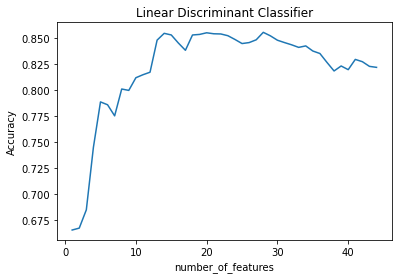

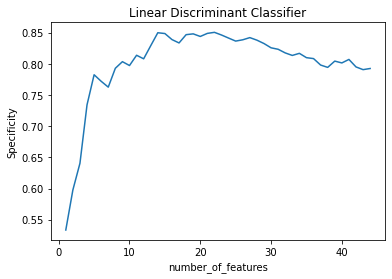

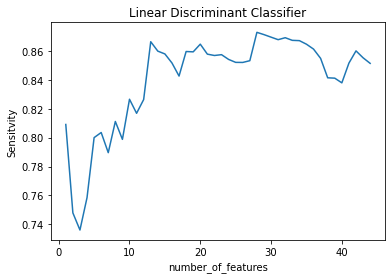

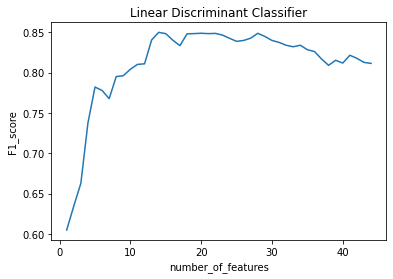

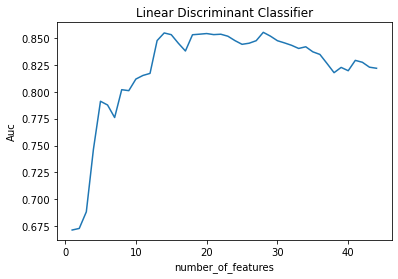

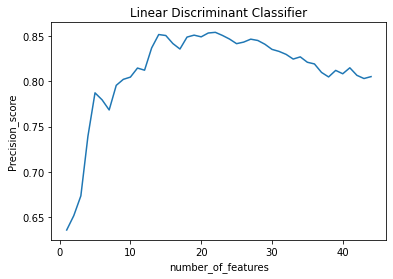

In [ ]:
# Plotting number of features vs the metrics

# number of features vs accuracy
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Accuracy": np.array(LDAScores['accuracy_scores'])})
sns.lineplot(x='number_of_features', y='Accuracy', data=data)
plt.title('Linear Discriminant Classifier')
plt.show()

# number of features vs specificity
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Specificity": np.array(LDAScores['specificity'])})
sns.lineplot(x='number_of_features', y='Specificity', data=data)
plt.title('Linear Discriminant Classifier')
plt.show()

# number of features vs sensitvity
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Sensitvity": np.array(LDAScores['sensitvity'])})
sns.lineplot(x='number_of_features', y='Sensitvity', data=data)
plt.title('Linear Discriminant Classifier')
plt.show()

# number of features vs f1_scores
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"F1_score": np.array(LDAScores['f1_scores'])})
sns.lineplot(x='number_of_features', y='F1_score', data=data)
plt.title('Linear Discriminant Classifier')
plt.show()

# number of features vs auc
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Auc": np.array(LDAScores['auc_scores'])})
sns.lineplot(x='number_of_features', y='Auc', data=data)
plt.title('Linear Discriminant Classifier')
plt.show()

# number of features vs precision
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Precision_score": np.array(LDAScores['precision_scores'])})
sns.lineplot(x='number_of_features', y='Precision_score', data=data)
plt.title('Linear Discriminant Classifier')
plt.show()

In [ ]:
# Getting index for the maximum values
maxIndex = np.argmax(np.array(LDAScores['accuracy_scores']))

maxValues.append(["LDA", 
maxIndex,
LDAScores["accuracy_scores"][maxIndex], 
LDAScores["specificity"][maxIndex],
LDAScores["sensitvity"][maxIndex],
LDAScores["f1_scores"][maxIndex],
LDAScores["auc_scores"][maxIndex],
LDAScores["precision_scores"][maxIndex],
])

In [ ]:
# For maximum values for each classifiers
maxValues = list()
print('Maximum value feature of Linear Discriminant Classifier: ',maxIndex)

Maximum value feature of Linear Discriminant Classifier:  27


# **Quadratic Discriminant Classifier**
Implementation

In [ ]:
# Evaluating the Classifier
print('Quadratic Discriminant Classifier')
QDAScores = evaluate_model(QDA_clf, df, y)
print(QDAScores)

Quadratic Discriminant Classifier


<ipython-input-11-f478ab344113>:64: RuntimeWarning: invalid value encountered in longlong_scalars
  split_precision.append((tp / (tp + fp)) )



specificity : [0.4545597697280362, 0.5117862648531379, 0.5368281788558877, 0.5735507873275671, 0.7270565315661291, 0.681694521388484, 0.6353547104254529, 0.7175668081488515, 0.7204979315146489, 0.7426646294881586, 0.7623090083978626, 0.7977480541130689, 0.8229062164357828, 0.819964281659173, 0.7961933859054598, 0.8123458500907417, 0.8163118434025548, 0.8122242664456277, 0.8098046221236616, 0.7937769596932128, 0.800367967051868, 0.7941286244715035, 0.7912531931261031, 0.7963442673253814, 0.7869976805959774, 0.7818223570890748, 0.7783719920258613, 0.7844917627779852, 0.7643272753046743, 0.7717750704919433, 0.7730786700915181, 0.7850611842234133, 0.7730759274265468, 0.7637397108567386, 0.7604712157983051, 0.7736392989535402, 0.7639584824875842, 0.7385174698538471, 0.7393950543780262, 0.7347717499390872, 0.7276280868426377, 0.7506549325975013, 0.7453036837259741, 0.747888918838299]
sensitvity : [0.8090782528101408, 0.7569533938713497, 0.7455993778151665, 0.7377600515239827, 0.766053707386

**Metrics for Quadratic Discriminant Classifier**

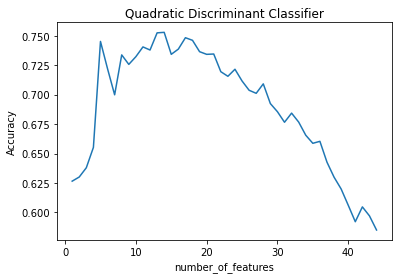

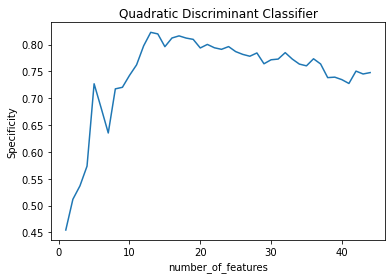

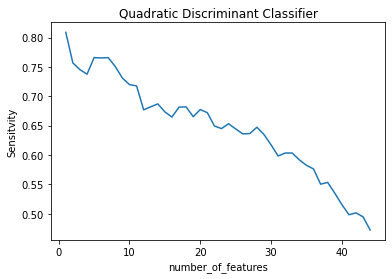

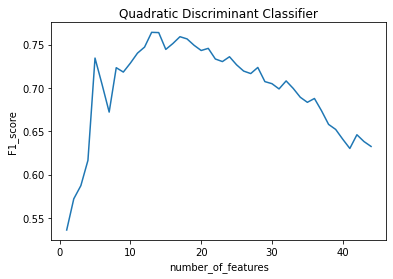

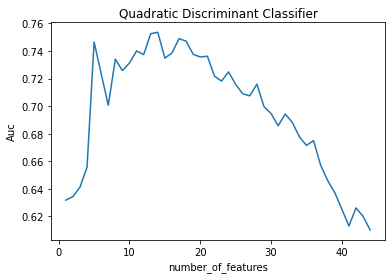

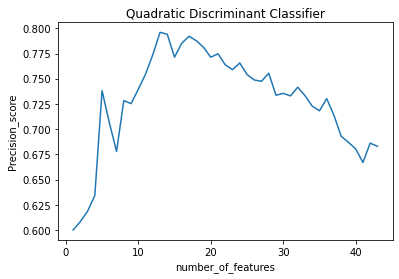

In [ ]:
# Plotting number of features vs the metrics

# number of features vs accuracy
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Accuracy": np.array(QDAScores['accuracy_scores'])})
sns.lineplot(x='number_of_features', y='Accuracy', data=data)
plt.title('Quadratic Discriminant Classifier')
plt.show()

# number of features vs specificity
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Specificity": np.array(QDAScores['specificity'])})
sns.lineplot(x='number_of_features', y='Specificity', data=data)
plt.title('Quadratic Discriminant Classifier')
plt.show()

# number of features vs sensitvity
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Sensitvity": np.array(QDAScores['sensitvity'])})
sns.lineplot(x='number_of_features', y='Sensitvity', data=data)
plt.title('Quadratic Discriminant Classifier')
plt.show()

# number of features vs f1_scores
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"F1_score": np.array(QDAScores['f1_scores'])})
sns.lineplot(x='number_of_features', y='F1_score', data=data)
plt.title('Quadratic Discriminant Classifier')
plt.show()

# number of features vs auc
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Auc": np.array(QDAScores['auc_scores'])})
sns.lineplot(x='number_of_features', y='Auc', data=data)
plt.title('Quadratic Discriminant Classifier')
plt.show()

# number of features vs precision
data = pd.DataFrame({"number_of_features" : np.array(range(1,45)),
"Precision_score": np.array(QDAScores['precision_scores'])})
sns.lineplot(x='number_of_features', y='Precision_score', data=data)
plt.title('Quadratic Discriminant Classifier')
plt.show()

In [ ]:
# Getting index for the maximum values
maxIndex = np.argmax(np.array(QDAScores['accuracy_scores']))

maxValues.append(["QDE", 
maxIndex,
QDAScores["accuracy_scores"][maxIndex], 
QDAScores["specificity"][maxIndex],
QDAScores["sensitvity"][maxIndex],
QDAScores["f1_scores"][maxIndex],
QDAScores["auc_scores"][maxIndex],
QDAScores["precision_scores"][maxIndex],
])

In [ ]:
# For maximum values for each classifiers
maxValues = list()
print('Quadratic Discriminant Classifier: ',maxIndex)

Quadratic Discriminant Classifier:  13


# **mean ± standard deviation**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
for i in tqdm(range(1)):  
  for clf_name, clf in nonlr_clf_dict.items():
    specificity = list()
    sensitvity = list()
    f1_scores = list()
    auc_scores = list()
    accuracy_scores = list()
    precision_scores = list()  

    specificity_std = list()
    sensitvity_std = list()
    f1_scores_std = list()
    auc_scores_std = list()
    accuracy_scores_std = list()
    precision_scores_std = list()   

    for i in range(0, 45):# features
    # for i in range(0, 3):
        # We generate the set of features
      feat = X.iloc[:,:i+1]
      target = y
      # n_repeats=100
      fold = RepeatedKFold(n_splits=5, n_repeats=100, random_state=10)
      # list for each features
      split_sensi = list()
      split_speci = list()
      split_accu = list()
      split_f1 = list()
      split_precision = list()
      split_auc = list()

      #for n in range(100):
      for train_index, test_index in fold.split(feat):# train_index, test_index in skf.split():

        X_train= feat.iloc[train_index,:]
        X_test = feat.iloc[test_index,:]
        y_train = target.iloc[train_index]
        y_test= target.iloc[test_index]
                    
              
        # Fitting the classifier 
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # We have confusion matrx
        cm = confusion_matrix(y_test,y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Calucating metrics for each iteration
        split_sensi.append(tp / (tp+fn))
        split_speci.append(tn / (tn+fp))
                
        # Calculating accuracy
        split_accu.append(accuracy_score(y_test, y_pred))

        # Calculating auc_scores
        split_auc.append(roc_auc_score(y_test, y_pred))

        # Calculating f1 scores
        split_f1.append(f1_score(y_test, y_pred))

        # Calculating precision
        split_precision.append((tp / (tp + fp)) )
                    

    # After competing all folds, appending the average of metrics to the main matric list
    print("")
    print("Classifier :",  clf_name)
    sensitvity.append(sum(split_sensi) / len(split_sensi))
    specificity.append(sum(split_speci) / len(split_sensi))
    precision_scores.append(sum(split_precision) / len(split_sensi))
    auc_scores.append(sum(split_auc) / len(split_sensi))
    accuracy_scores.append(sum(split_accu) / len(split_sensi))
    f1_scores.append(sum(split_f1) / len(split_sensi))
    # st dev --> import statistics, statistics.pstdev(list)
    sensitvity_std.append(statistics.stdev(split_sensi))
    specificity_std.append(statistics.stdev(split_speci))
    precision_scores_std.append(statistics.stdev(split_precision))
    auc_scores_std.append(statistics.stdev(split_auc))
    accuracy_scores_std.append(statistics.stdev(split_accu))
    f1_scores_std.append(statistics.stdev(split_f1))



    print("specificity :",  specificity)
    print("sensitvity :", sensitvity)
    print("f1_scores :",f1_scores)
    print("auc_scores :", auc_scores)
    print("accuracy_scores :", accuracy_scores)
    #print("precision_scores :", precision_scores)

    print("accuracy_scores :", accuracy_scores,'+/-',accuracy_scores_std)
    print("specificity :",  specificity,'+/-',specificity_std)
    print("sensitvity :", sensitvity,'+/-',sensitvity_std)
    print("f1_scores :",f1_scores,'+/-',f1_scores_std)
    print("auc_scores :", auc_scores,'+/-',auc_scores_std)

    #print("precision_scores :", precision_scores,'+/-',precision_scores_std)
    #print("")
    #print("sensitvity_std :",  sensitvity_std)
    #print("specificity_std :", specificity_std)
    #print("precision_scores_std :",precision_scores_std)
    #print("auc_scores_std :", auc_scores_std)

    #print("accuracy_scores_std :", accuracy_scores_std)
    #print("f1_scores_std :", f1_scores_std)


  0%|          | 0/1 [00:00<?, ?it/s]


Classifier : Linear Discriminant Classifier
specificity : [0.7939180833184708]
sensitvity : [0.846870281627557]
f1_scores : [0.8096449021191006]
auc_scores : [0.8203941824730133]
accuracy_scores : [0.8195935960591129]
accuracy_scores : [0.8195935960591129] +/- [0.06397238090782918]
specificity : [0.7939180833184708] +/- [0.10455686223850105]
sensitvity : [0.846870281627557] +/- [0.09399664170671591]
f1_scores : [0.8096449021191006] +/- [0.07667760377121002]
auc_scores : [0.8203941824730133] +/- [0.0655516338282783]

Classifier : Quadratic Discriminant Classifier
specificity : [0.7403200217395272]
sensitvity : [0.4781652699897282]
f1_scores : [0.6254122658668505]
auc_scores : [0.6092426458646272]
accuracy_scores : [0.5805394088669948]
accuracy_scores : [0.5805394088669948] +/- [0.10078562583881624]
specificity : [0.7403200217395272] +/- [0.20237765855024314]
sensitvity : [0.4781652699897282] +/- [0.2427315900549856]
f1_scores : [0.6254122658668505] +/- [0.09916841716703252]
auc_scores 

100%|██████████| 1/1 [1:18:48<00:00, 4728.84s/it]


Classifier : Naive Bayes Classifier
specificity : [0.8330953037416661]
sensitvity : [0.8527767490765169]
f1_scores : [0.835876020371009]
auc_scores : [0.8429360264090915]
accuracy_scores : [0.8421256157635469]
accuracy_scores : [0.8421256157635469] +/- [0.06453258352468601]
specificity : [0.8330953037416661] +/- [0.10521024828779438]
sensitvity : [0.8527767490765169] +/- [0.0915037413771607]
f1_scores : [0.835876020371009] +/- [0.07421650826477444]
auc_scores : [0.8429360264090915] +/- [0.06600999934340553]
